In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
dir_path = "C:/Users/Mohan/Downloads/archive (3)/chest_xray"


In [3]:
''' training path '''
train_p = os.path.join(dir_path, "train")

''' test path '''
test_p =os.path.join(dir_path, "test")

''' val path '''
val_p = os.path.join(dir_path, "val")


In [4]:
''' PNEUMONIA images '''
p_train_images = glob.glob(train_p + "/PNEUMONIA/*.jpeg")

''' NORMAL  images '''
n_train_images = glob.glob(train_p + "/NORMAL/*.jpeg")


In [5]:
df = pd.DataFrame(np.concatenate([[0]*len(n_train_images) , [1] *  len(p_train_images)]),columns=["class"])


In [6]:
df


,class
0,0
1,0
2,0
3,0
4,0
...,...
5211,1
5212,1
5213,1
5214,1


<Axes: xlabel='class', ylabel='count'>

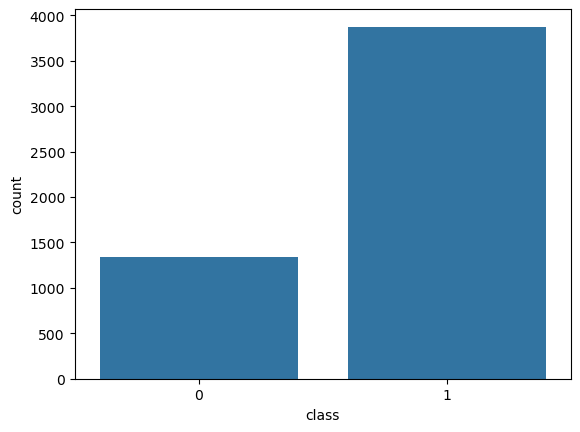

In [7]:
sns.countplot(x=df['class'],data=df)


In [8]:
''' Data Augmentation '''
train_ds = ImageDataGenerator(rescale =1/255, shear_range=10, zoom_range = 0.2, horizontal_flip = True, 
                              width_shift_range=0.2, fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
    rescale = 1/255
)


In [9]:
''' VGG16 Model '''

model1 = VGG16(include_top = False,weights='imagenet')

''' freezing layers '''
for i in model1.layers:
    i.trainable=False
    
out = model1.output

''' GlobalAveragePooling Layer '''
out = keras.layers.GlobalAveragePooling2D()(out)
out = keras.layers.Dense(128, activation='relu')(out)

''' Classification Layer '''
pred = keras.layers.Dense(1, activation='sigmoid')(out)

''' final model '''
model= keras.Model(model1.input, pred)

lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr, decay_steps=100000, decay_rate=0.96, staircase=True)

''' Compile the model '''
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr_schedule), metrics=['accuracy'])


In [10]:
''' lets see how model looks like '''
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
''' flow from directory '''
train_ds = train_ds.flow_from_directory(train_p, target_size=(150,150), batch_size= 16, class_mode='binary')

val_ds = val_datagen.flow_from_directory(val_p, target_size=(150,150),batch_size=8, class_mode='binary')

tes_ds = val_datagen.flow_from_directory(test_p, target_size=(150,150), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
''' training '''
history = model.fit(train_ds, steps_per_epoch = 100, epochs=20, validation_data=val_ds)


Epoch 1/20


c:\Users\Mohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7123 - loss: 7.8464 - val_accuracy: 0.7500 - val_loss: 0.6385
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8741 - loss: 0.3293 - val_accuracy: 0.8750 - val_loss: 0.3439
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8734 - loss: 0.3248 - val_accuracy: 0.8750 - val_loss: 0.2703
Epoch 4/20
 26/100 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.8736 - loss: 0.2835

c:\Users\Mohan\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 378ms/step - accuracy: 0.8924 - loss: 0.2557 - val_accuracy: 0.8125 - val_loss: 0.4284
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8773 - loss: 0.3194 - val_accuracy: 0.6875 - val_loss: 0.5940
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9093 - loss: 0.2646 - val_accuracy: 0.6875 - val_loss: 0.8356
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8874 - loss: 0.3428 - val_accuracy: 0.6875 - val_loss: 0.6242
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 373ms/step - accuracy: 0.8911 - loss: 0.2753 - val_accuracy: 0.8750 - val_loss: 0.3883
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9085 - loss: 0.2414 - val_accuracy: 0.8750 - val_loss: 0.3833
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8909 - loss: 0.2881 - val_accuracy: 0.8125 - val_loss: 0.3766
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9094 - loss: 0.2298 - val_accuracy:

In [13]:
accuracy = model.evaluate(tes_ds,steps=624)[1]


624/624 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.9056 - loss: 0.3496


In [14]:
accuracy


0.9054487347602844

In [15]:
''' unfreezing layers '''
for layer in model1.layers:
    layer.trainable = True


In [16]:
'''Finetuning the model'''
lr = 1e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr, decay_steps=100000, decay_rate=0.96, staircase=True)

''' compile the model '''
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr_schedule), loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])


In [17]:
''' training '''
model.fit(train_ds, steps_per_epoch = 50, epochs=10, validation_data=val_ds)


Epoch 1/10


c:\Users\Mohan\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - binary_accuracy: 0.6842 - loss: 1.1555 - val_binary_accuracy: 0.5625 - val_loss: 0.9646
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - binary_accuracy: 0.6884 - loss: 0.7618 - val_binary_accuracy: 0.8125 - val_loss: 0.6603
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - binary_accuracy: 0.7979 - loss: 0.5550 - val_binary_accuracy: 0.8750 - val_loss: 0.3357
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - binary_accuracy: 0.8671 - loss: 0.5038 - val_binary_accuracy: 0.8125 - val_loss: 0.4527
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - binary_accuracy: 0.8703 - loss: 0.3783 - val_binary_accuracy: 0.6875 - val_loss: 1.6395
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - binary_accuracy: 0.8830 - loss: 0.3577 - val_binary_accuracy: 0.8125 - val_loss: 0.3687
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - binary_accuracy: 0.8974 - loss: 0.2983 - val_binary_accuracy: 0.8125 - val_loss: 0.4050
Epoch 8/10
50/50 ━━━━━━━━

In [18]:
''' evaluating model '''
final_acc = model.evaluate(tes_ds,steps=624)[1]


624/624 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - binary_accuracy: 0.8699 - loss: 0.8804


In [19]:
final_acc


0.870192289352417

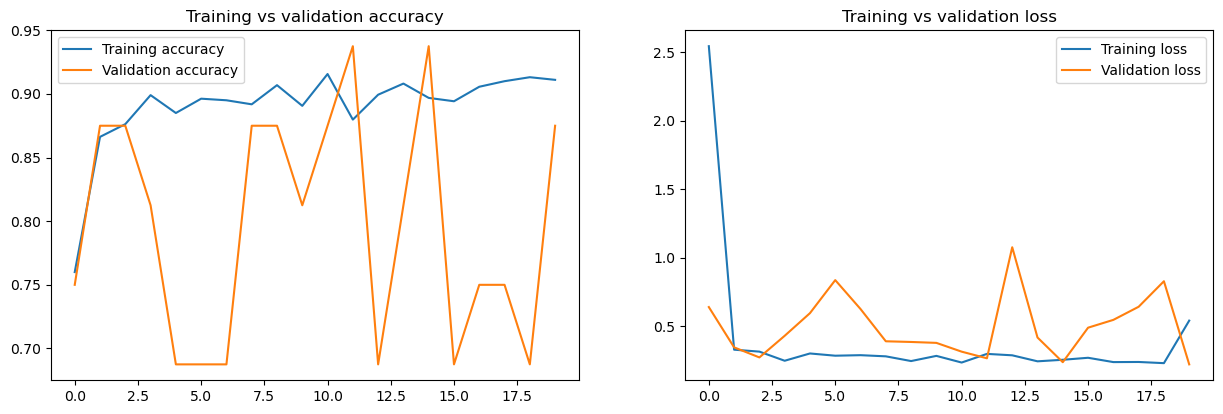

In [20]:
''' Training Accuracy and Validaion Accuracy graph '''
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

''' Training Loss and Validation Loss graph '''
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()
